[View in Colaboratory](https://colab.research.google.com/github/ugocupcic/LinuxMagKerasTpot/blob/master/Keras_TPot.ipynb)

# Utiliser le machine learning pour un problème de classification

## Générons notre dataset de test

Nous allons utiliser la librairie open source scipy afin de générer très facilement un jeu de données à classifier. 

In [0]:
from sklearn.datasets import make_moons, make_blobs
from matplotlib import pyplot
from pandas import DataFrame

def visualise_dataset(input_data, labels):
    df = DataFrame(dict(x=input_data[:,0], y=input_data[:,1], label=labels))
    
    colors = {0:'red', 1:'blue'}
    fig, ax = pyplot.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    pyplot.show()


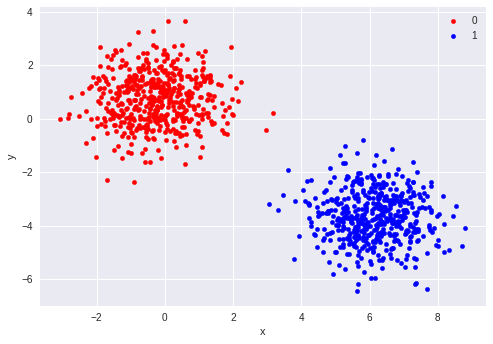

In [4]:
coordinates, labels = make_blobs(n_samples=1000, centers=2, n_features=2)

visualise_dataset(coordinates, labels)

In [0]:
# generate 2d classification dataset
coordinates, labels = make_moons(n_samples=10000, noise=0.3)
# scatter plot, dots colored by class value

# evaluate our model on another dataset
coordinates_evaluate, labels_evaluate = make_moons(n_samples=10000, noise=0.3)

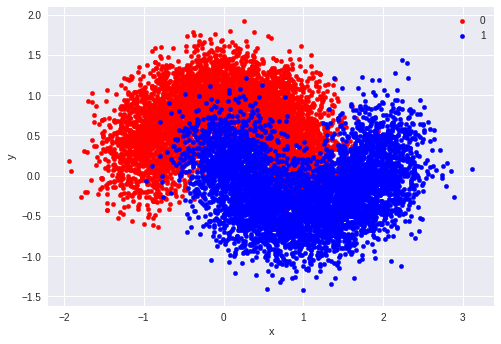

In [6]:
visualise_dataset(coordinates, labels)

## Prédiction de la catégorie

In [7]:
import keras

Using TensorFlow backend.


In [8]:
from keras.models import Sequential
from keras.layers import Dense


# create model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(coordinates, labels, epochs=50, batch_size=1000)

Epoch 1/50
10000/10000 [==============================] - 1s 110us/step - loss: 0.7000 - acc: 0.4999
Epoch 2/50
10000/10000 [==============================] - 0s 6us/step - loss: 0.6926 - acc: 0.5016
Epoch 3/50
10000/10000 [==============================] - 0s 6us/step - loss: 0.6854 - acc: 0.5041
Epoch 4/50
10000/10000 [==============================] - 0s 6us/step - loss: 0.6787 - acc: 0.5156
Epoch 5/50
10000/10000 [==============================] - 0s 6us/step - loss: 0.6722 - acc: 0.5303
Epoch 6/50
10000/10000 [==============================] - 0s 6us/step - loss: 0.6659 - acc: 0.5506
Epoch 7/50
10000/10000 [==============================] - 0s 6us/step - loss: 0.6600 - acc: 0.5753
Epoch 8/50
10000/10000 [==============================] - 0s 6us/step - loss: 0.6543 - acc: 0.6041
Epoch 9/50
10000/10000 [==============================] - 0s 6us/step - loss: 0.6487 - acc: 0.6350
Epoch 10/50
10000/10000 [==============================] - 0s 6us/step - loss: 0.6433 - acc: 0.6643
Epoch 1

In [9]:

# evaluate the model on our second dataset
scores = model.evaluate(coordinates_evaluate, labels_evaluate)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 1s 61us/step

acc: 84.70%


In [0]:
# and display the prediction

# calculate predictions
predictions = model.predict(coordinates_evaluate)
# round predictions to get our 0 / 1 category
rounded = [round(x[0]) for x in predictions]


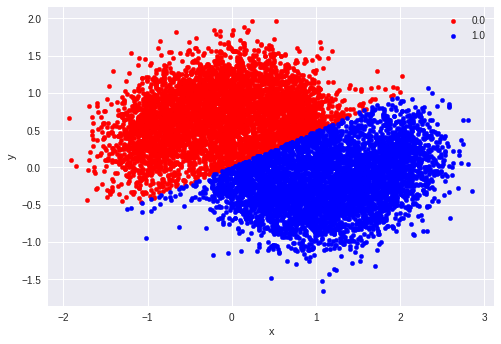

In [11]:
# and display them
visualise_dataset(coordinates_evaluate,rounded)


## Et maintenant avec TPot

In [4]:
!pip install tpot

    100% |████████████████████████████████| 901kB 6.7MB/s 
    100% |████████████████████████████████| 942kB 9.4MB/s 
  Running setup.py bdist_wheel for tpot ... - \ done
  Stored in directory: /root/.cache/pip/wheels/97/86/27/698a1366f854d2344fd0f7ee9ef57c8044ec02f182c8a0431e
  Running setup.py bdist_wheel for deap ... - \ | / - \ | / - \ done
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
  Running setup.py bdist_wheel for stopit ... - done
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built tpot deap stopit


In [0]:
from tpot import TPOTClassifier

In [7]:
tpot = TPOTClassifier(generations=5, population_size=30, verbosity=2)
tpot.fit(X, y)
print(tpot.score(x_evaluate, y_evaluate))

predictions = tpot.predict(x_evaluate)    

Optimization Progress:  33%|███▎      | 60/180 [01:24<03:18,  1.65s/pipeline]

Generation 1 - Current best internal CV score: 0.9121


Optimization Progress:  50%|█████     | 90/180 [02:40<02:47,  1.86s/pipeline]

Generation 2 - Current best internal CV score: 0.9121


Optimization Progress:  67%|██████▋   | 120/180 [03:58<02:16,  2.28s/pipeline]

Generation 3 - Current best internal CV score: 0.9121


Optimization Progress:  83%|████████▎ | 150/180 [04:46<01:19,  2.66s/pipeline]

Generation 4 - Current best internal CV score: 0.9121


Generation 5 - Current best internal CV score: 0.9124000000000001

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=10, min_child_weight=8, n_estimators=100, nthread=1, subsample=0.4)
0.9096


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


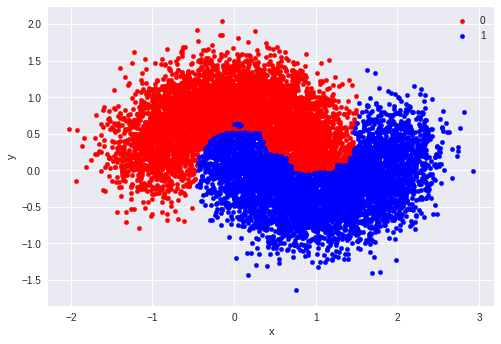

In [8]:
# scatter plot, dots colored by class value
visualise_dataset(x_evaluate, predictions)
